# Loading an audio file

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import librosa
audio_path = '../../Miguel Capule/Feature Extraction From Audio - Capule/test2.wav'
x , sr = librosa.load(audio_path)

# Playing Audio

Using IPython.display.Audio, to play the audio

In [3]:
import IPython.display as ipd
ipd.Audio(audio_path)

You can even use an mp3 or a WMA format for the audio example.

# Visualizing Audio

## Waveform

We can plot the audio array using librosa.display.waveplot:

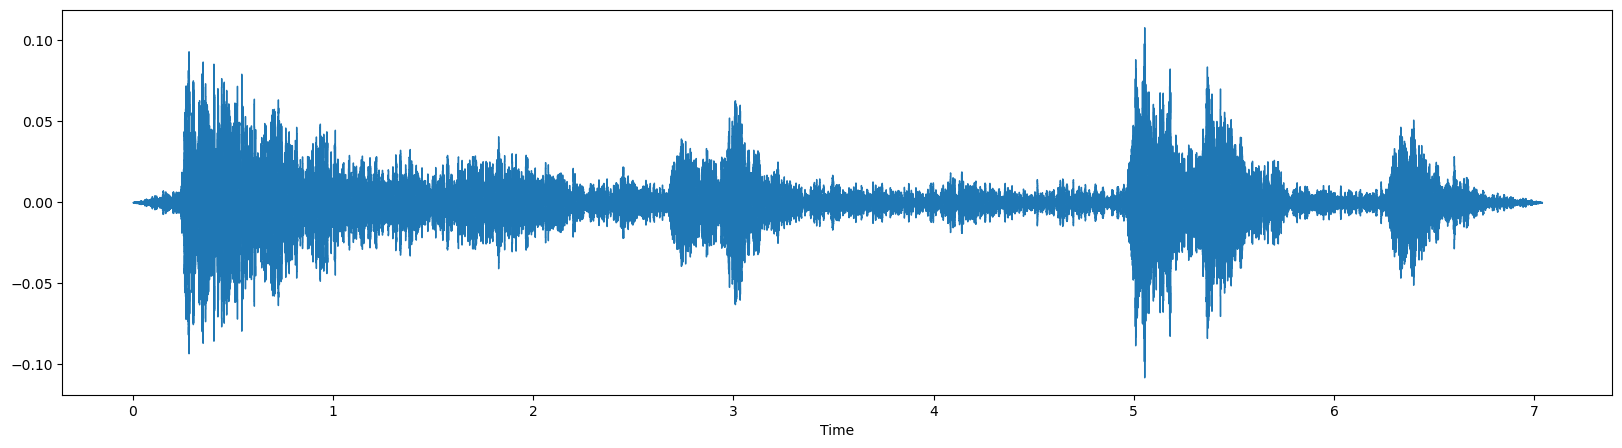

In [4]:
%matplotlib inline
import sklearn.preprocessing
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(20, 5))
librosa.display.waveshow(x, sr=sr)

Here, we have the plot the amplitude envelope of a waveform.

# Spectrogram

We can also display a spectrogram using librosa.display.specshow.

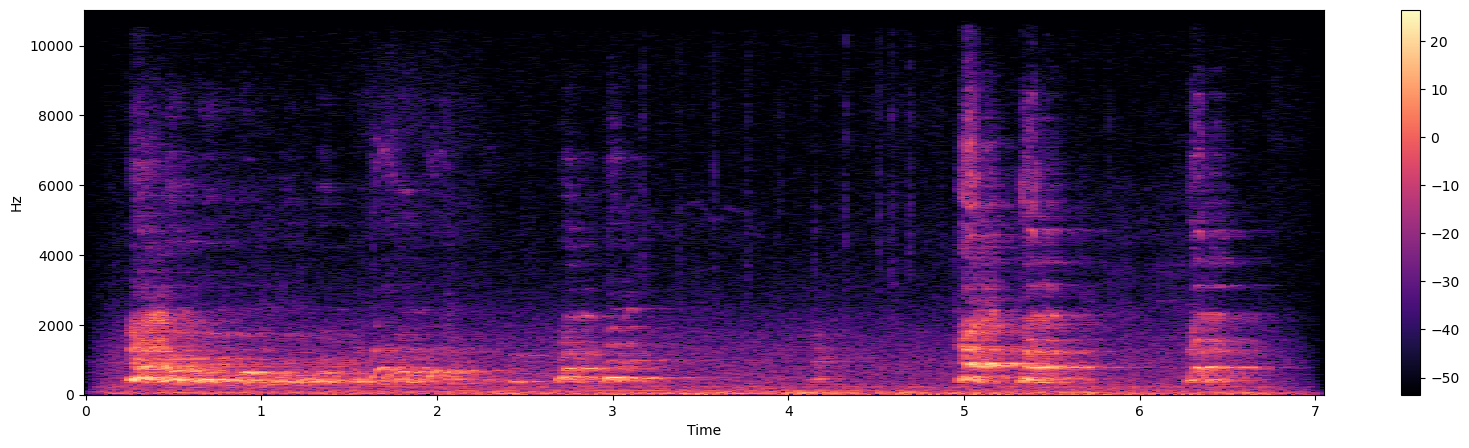

In [5]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

# Log Frequency axis

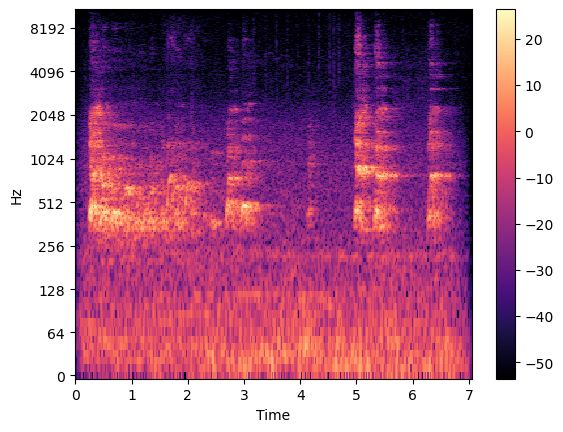

In [6]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

# Creating an audio signal

Let us now create an audio signal at 220Hz. We know an audio signal is a numpy array, so we shall create one and pass it on to the audio function.

In [7]:
import numpy as np
import scipy.io.wavfile as wavfile
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz

# Playing the sound

In [8]:
ipd.Audio(x, rate=sr) # load a NumPy array

# Saving the signal

In [9]:
# Write the audio data to a WAV file
wavfile.write('../test2.wav', sr, x)

# Feature Extraction

In [10]:
x, sr = librosa.load('../../Miguel Capule/Feature Extraction From Audio - Capule/test3.wav')
ipd.Audio(x, rate=sr)

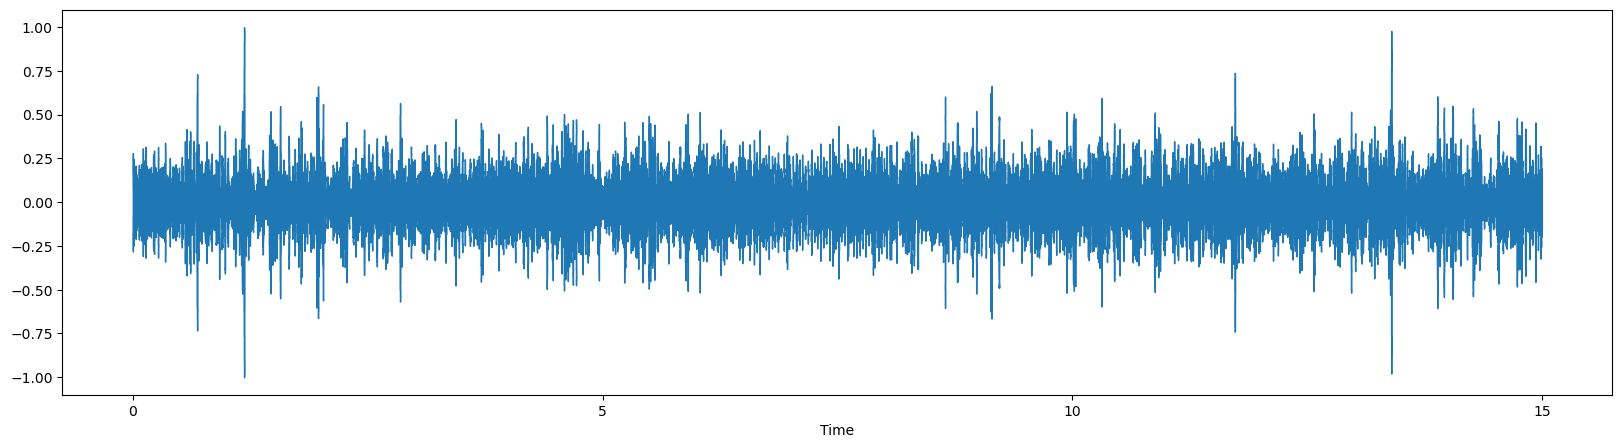

In [11]:
#Plot the signal:
plt.figure(figsize=(20, 5))
librosa.display.waveshow(x, sr=sr)

# 1. Zero Crossing Rate

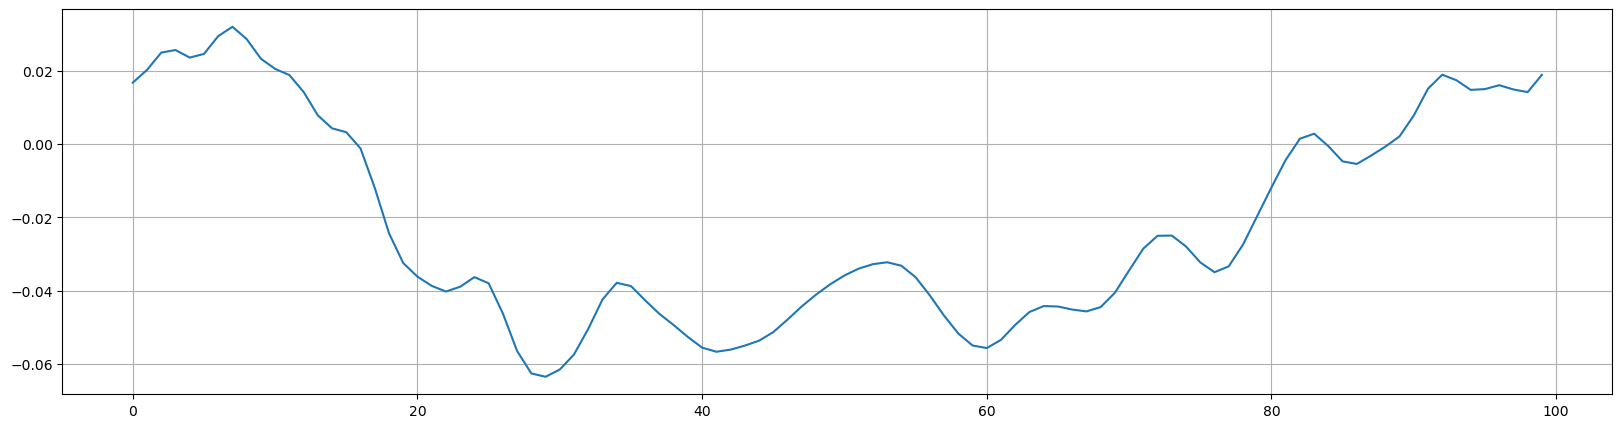

In [12]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(20, 5))
plt.plot(x[n0:n1])
plt.grid()

I count 6 zero crossings. Let's compute the zero crossings using librosa.

In [13]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zero_crossings.shape

(100,)

In [14]:
print(sum(zero_crossings))

4


# 2.Spectral Centroid

In [15]:
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
spectral_centroids.shape

(646,)

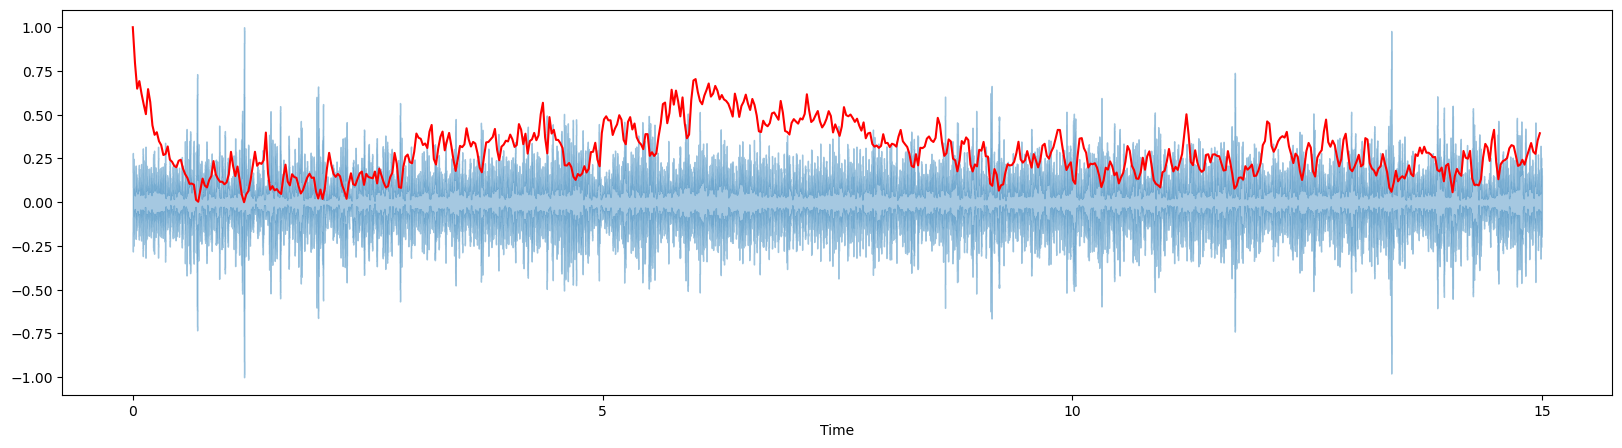

In [16]:
# Computing the time variable for visualization
plt.figure(figsize=(20,5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

# 3.Spectral Rolloff

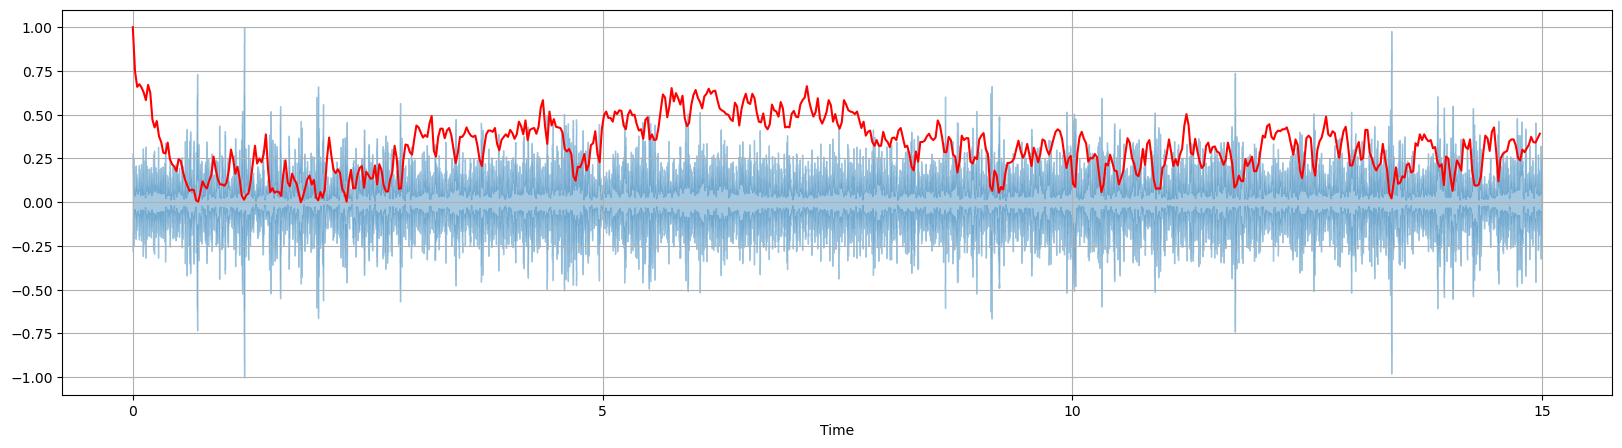

In [17]:
plt.figure(figsize=(20,5))
spectral_rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr)[0]
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()

# 4.MFCC

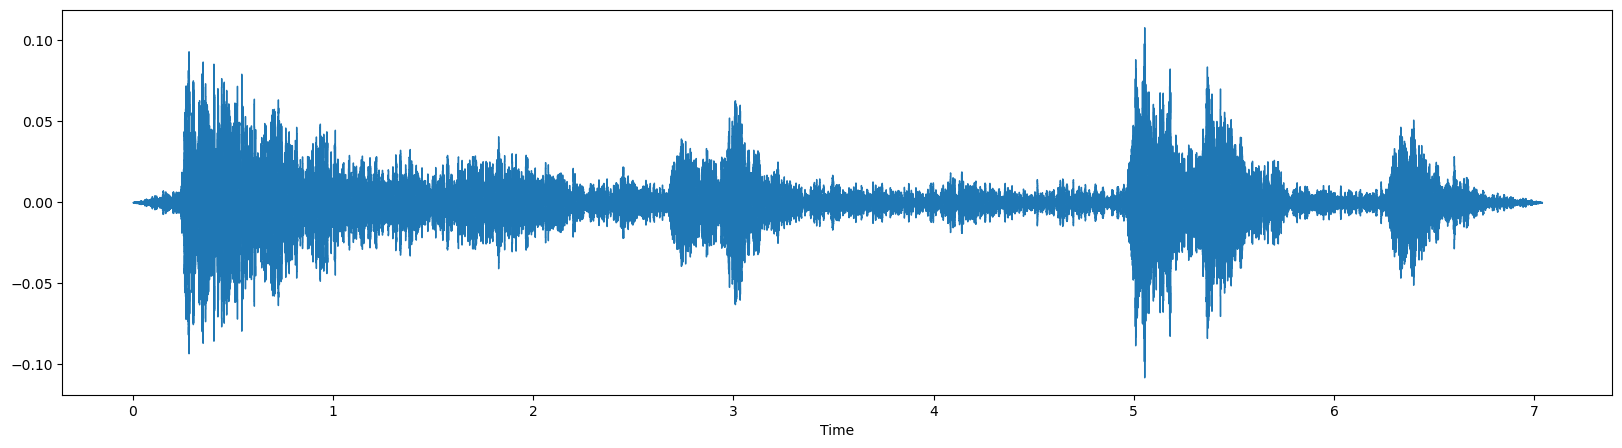

In [18]:
plt.figure(figsize=(20,5))
x, fs = librosa.load('../../Miguel Capule/Feature Extraction From Audio - Capule/test2.wav')
librosa.display.waveshow(x, sr=sr)

(20, 304)


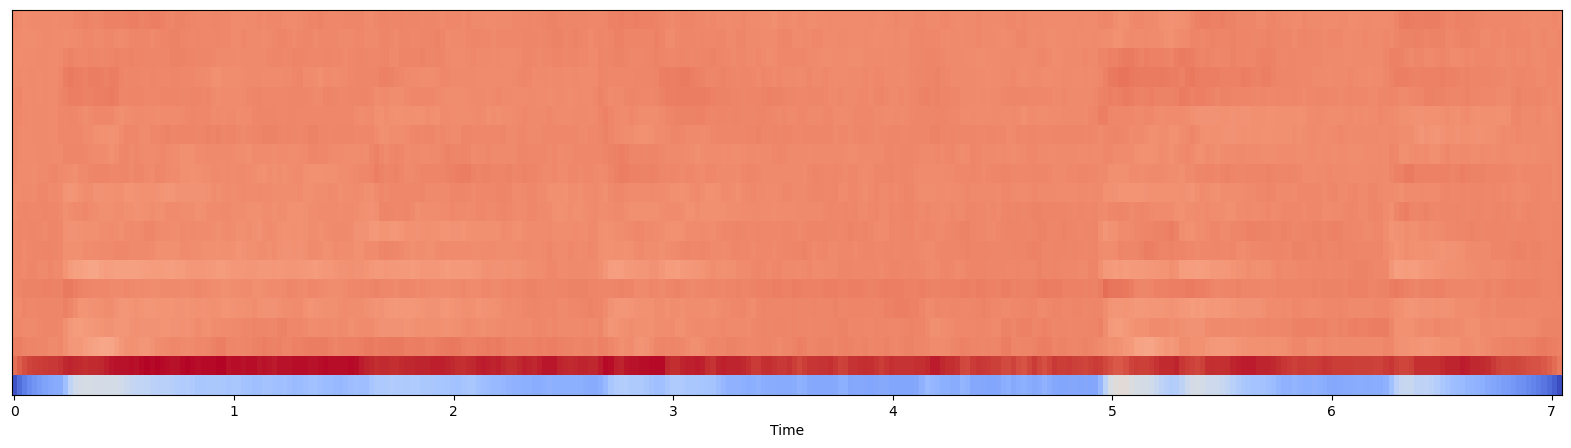

In [19]:
plt.figure(figsize=(20, 5))
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

# Feature Scaling

Let's scale the MFCCs such that each coefficient dimension has zero mean and unit variance:

In [20]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[ 6.2741732e-09  0.0000000e+00 -1.2548346e-08  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
 -2.5096693e-08  0.0000000e+00  0.0000000e+00  9.4112593e-09
  0.0000000e+00 -1.2548346e-08  0.0000000e+00 -9.4112593e-09
  0.0000000e+00 -6.2741732e-09  0.0000000e+00 -1.2548346e-08]
[1.        0.9999999 1.0000001 1.        1.        1.0000001 1.
 1.        1.0000001 1.        1.        1.        0.9999998 1.0000001
 1.        1.0000001 1.        1.        1.0000001 1.0000001]


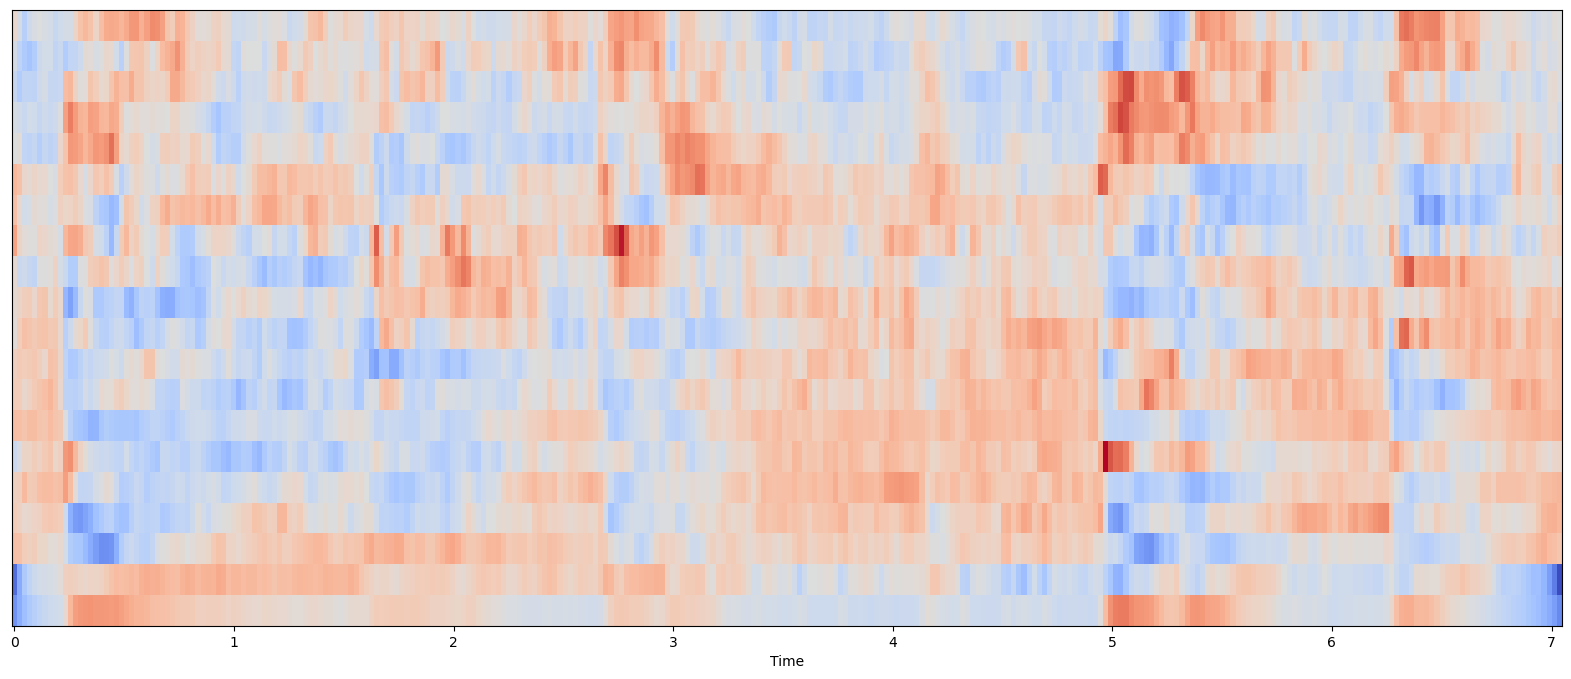

In [21]:
plt.figure(figsize=(20,8))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

# Chroma Frequencies

In [22]:
# Loadign the file
x, sr = librosa.load('../../Miguel Capule/Feature Extraction From Audio - Capule/test2.wav')
ipd.Audio(x, rate=sr)

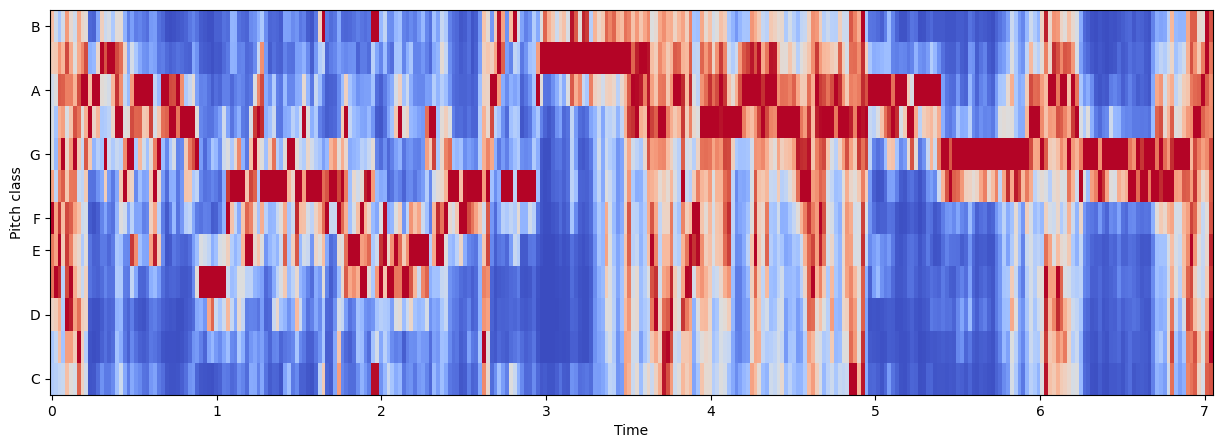

In [23]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')